# Númenorian Rage (Work in Progress)


The Númenorians play a major role in Tolkien's stories. They were a group of people who have been blessed with long lives, wisdom and strength because of the courage and loyalty their ancestors showed in the War of Wrath.

Over time, the Númenorians started to envy the immortality of the elves. After a few generations, they developed an animosity towards the very powers that blessed them. This resulted in their lifespans decreasing slowly throughout the generations.

Elros, twin brother of Elrond, was the first King of Númenor. He lived to 500. Everything went downhill from there. The penultimate Númenorian King, `Tar-Palantir`, despite having tried to reverse the rebellious nature of his people, died at 220 years old.

This project explores the lifespans of the Númenorian Kings until the kingdom's downfall 3000 years later. Then we explore the lifespans of the Gondorian and Arnorian Kings who are also direct descendants of Elros albeit through a different line.

Gondor and Arnor were established in Middle Earth immediately after Númenor fell. Tolkien details all the ruling monarchs from those kingdoms for 3000+ years after they were founded. This gives us an opportunity to explore how events in the History of Middle Earth affected the lifespans of these High Men.

In [1]:
import csv
import pandas
import matplotlib.pyplot as plt
from math import isnan
%matplotlib inline

In [2]:
headers = [
    'url',
    'referrer',
    'name',
    'other_names',
    'titles',
    'birth_age',
    'birth_year',
    'death_age',
    'death_year',
    'rule_age',
    'rule_year']

### Acquiring the data and filtering them

I have created a scraper that scrapes all Númenorians and their descendants. I cleaned the data (within reason) and loaded only the ruling monarchs into `kings_clean.psv`.

In [3]:
kings_table = pandas.read_csv('kings_clean.psv', sep='|', names=headers)
kings_table['name'] = kings_table['url'].apply(
    lambda x: x.replace('http://tolkiengateway.net/wiki/', ''))
kings_table

,url,referrer,name,other_names,titles,birth_age,birth_year,death_age,death_year,rule_age,rule_year
0,http://tolkiengateway.net/wiki/Elros,NaN,Elros,Tar-Minyatur,King of Númenor,F.A.,532.0,S.A.,442.0,S.A.,32
1,http://tolkiengateway.net/wiki/Elendil,NaN,Elendil,Nimruzîr,High King,S.A.,3119.0,S.A.,3441.0,S.A.,3320
2,http://tolkiengateway.net/wiki/Vardamir,b'http://tolkiengateway.net/wiki/Elros',Vardamir,Nólimon,King of Númenor,S.A.,61.0,S.A.,471.0,S.A.,442
3,http://tolkiengateway.net/wiki/Anárion,b'http://tolkiengateway.net/wiki/Elendil',Anárion,NaN,King,S.A.,3219.0,S.A.,3440.0,S.A.,3320
4,http://tolkiengateway.net/wiki/Isildur,b'http://tolkiengateway.net/wiki/Elendil',Isildur,NaN,High King,S.A.,3209.0,5,NaN,S.A.,3441
...,...,...,...,...,...,...,...,...,...,...,...
91,http://tolkiengateway.net/wiki/Argonui,b'http://tolkiengateway.net/wiki/Arathorn_I',Argonui,NaN,Chieftain of the Dúnedain,T.A.,2757.0,T.A.,2912.0,T.A.,2848
92,http://tolkiengateway.net/wiki/Arador,b'http://tolkiengateway.net/wiki/Argonui',Arador,NaN,Chieftain of the Dúnedain,T.A.,2820.0,T.A.,2930.0,T.A.,2912
93,http://tolkiengateway.net/wiki/Arathorn_II,b'http://tolkiengateway.net/wiki/Arador',Arathorn_II,NaN,Chieftain of the Dúnedain,T.A.,2873.0,T.A.,2933.0,T.A.,2930
94,http://tolkiengateway.net/wiki/Aragorn,b'http://tolkiengateway.net/wiki/Arathorn_II',Aragorn,"Aragorn II,",Chieftain of the Dúnedain,1,NaN,Fo.A.,120.0,T.A.,2933


Compute the lifespan and rule length of each king

In [4]:
kings_table = kings_table[[
        'name', 'other_names', 'titles', 'birth_age', 'birth_year', 
        'death_age', 'death_year','rule_age', 'rule_year'
    ]].sort_values(
        ['rule_age','rule_year'])

kings_table['rule_length'] = (
    kings_table['rule_year'].shift(-1)
    - kings_table['rule_year'])

kings_table['lifespan'] = (
    kings_table['death_year']
    - kings_table['birth_year'])

kings_table.head(50)


,name,other_names,titles,birth_age,birth_year,death_age,death_year,rule_age,rule_year,rule_length,lifespan
0,Elros,Tar-Minyatur,King of Númenor,F.A.,532.0,S.A.,442.0,S.A.,32,410.0,-90.0
2,Vardamir,Nólimon,King of Númenor,S.A.,61.0,S.A.,471.0,S.A.,442,0.0,410.0
5,Tar-Amandil,Ar-Aphanuzîr,King of Númenor,S.A.,192.0,S.A.,603.0,S.A.,442,148.0,411.0
9,Tar-Elendil,Parmaitë,King of Númenor,S.A.,350.0,S.A.,751.0,S.A.,590,150.0,401.0
13,Tar-Meneldur,Írimon,King of Númenor,S.A.,543.0,S.A.,942.0,S.A.,740,143.0,399.0
17,Tar-Aldarion,Anardil,King of Númenor,"April,",NaN,S.A.,1098.0,S.A.,883,192.0,NaN
21,Tar-Ancalimë,Emerwen Aranel,Ruling Queen of Númenor,S.A.,873.0,S.A.,1285.0,S.A.,1075,205.0,412.0
24,Tar-Anárion,NaN,King of Númenor,S.A.,1003.0,S.A.,1404.0,S.A.,1280,114.0,401.0
27,Tar-Súrion,NaN,King of Númenor,S.A.,1174.0,S.A.,1574.0,S.A.,1394,162.0,400.0
30,Tar-Telperiën,NaN,Ruling Queen of Númenor,S.A.,1320.0,S.A.,1731.0,S.A.,1556,175.0,411.0


Due to some one-off inconsistencies on the website's format, I decided to manually edit the broken values of some of the monarchs instead of overcomplicating my scraper. After all, I intend to use my scraper to gather information about the elves and dwarves of Arda in the future.

In [5]:
# Plug in few final values for the people whose lives have spanned more than one age
# Elros
kings_table.at[0, 'lifespan'] = 500
#Tar-Aldarion
kings_table.at[17, 'birth_age'] = 'S.A.'
kings_table.at[17, 'birth_year'] = 700
kings_table.at[17, 'lifespan'] = 398
# Isildur
kings_table.at[4, 'lifespan'] = 234
kings_table.at[4, 'death_age'] = 'T.A.'
kings_table.at[4, 'death_year'] = 2
kings_table.at[4, 'rule_length'] = 2

# Meneldil
kings_table.at[6, 'lifespan'] = 281
kings_table.at[6, 'rule_length'] = 156
kings_table.at[8, 'lifespan'] = 280

kings_table.iloc[7]

name               Tar-Anárion
other_names                NaN
titles         King of Númenor
birth_age                 S.A.
birth_year                1003
death_age                 S.A.
death_year                1404
rule_age                  S.A.
rule_year                 1280
rule_length                114
lifespan                   401
Name: 24, dtype: object

## The Númenorian Monarchs

I will start by examining how long the Númenorian Monarchs have lived and reigned. I shall start exploring how long each monarch ruled and how it decreased with their lifespan as the shadow fell over Númenor.

In [6]:
numenorian_kings_df = kings_table[
    (kings_table['titles']=='King of Númenor') 
    | (kings_table['titles']=='Ruling Queen of Númenor')]
numenorian_kings_df.head(10)

,name,other_names,titles,birth_age,birth_year,death_age,death_year,rule_age,rule_year,rule_length,lifespan
0,Elros,Tar-Minyatur,King of Númenor,F.A.,532.0,S.A.,442.0,S.A.,32,410.0,500.0
2,Vardamir,Nólimon,King of Númenor,S.A.,61.0,S.A.,471.0,S.A.,442,0.0,410.0
5,Tar-Amandil,Ar-Aphanuzîr,King of Númenor,S.A.,192.0,S.A.,603.0,S.A.,442,148.0,411.0
9,Tar-Elendil,Parmaitë,King of Númenor,S.A.,350.0,S.A.,751.0,S.A.,590,150.0,401.0
13,Tar-Meneldur,Írimon,King of Númenor,S.A.,543.0,S.A.,942.0,S.A.,740,143.0,399.0
17,Tar-Aldarion,Anardil,King of Númenor,S.A.,700.0,S.A.,1098.0,S.A.,883,192.0,398.0
21,Tar-Ancalimë,Emerwen Aranel,Ruling Queen of Númenor,S.A.,873.0,S.A.,1285.0,S.A.,1075,205.0,412.0
24,Tar-Anárion,NaN,King of Númenor,S.A.,1003.0,S.A.,1404.0,S.A.,1280,114.0,401.0
27,Tar-Súrion,NaN,King of Númenor,S.A.,1174.0,S.A.,1574.0,S.A.,1394,162.0,400.0
30,Tar-Telperiën,NaN,Ruling Queen of Númenor,S.A.,1320.0,S.A.,1731.0,S.A.,1556,175.0,411.0


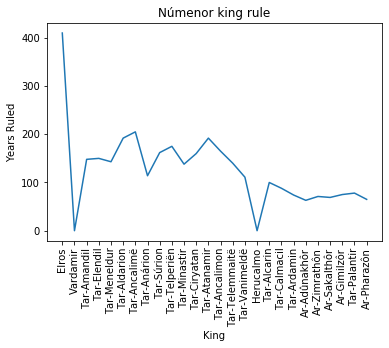

In [7]:
plt.plot(numenorian_kings_df['name'], 
         numenorian_kings_df['rule_length'])
plt.xlabel('King')
plt.ylabel('Years Ruled')
plt.title('Númenor king rule')
plt.xticks(rotation=90)
plt.show()

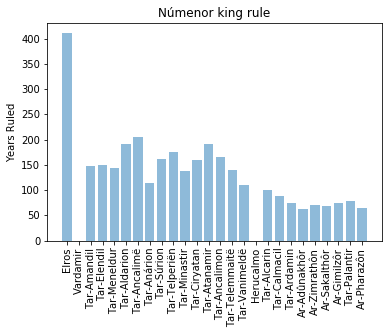

In [8]:
plt.bar(
    numenorian_kings_df['name'], 
    numenorian_kings_df['rule_length'], 
    align='center', alpha=0.5)
plt.xticks(rotation=90)
plt.ylabel('Years Ruled')
plt.title('Númenor king rule')

plt.show()

The two drops (Vardamir) and (Herucalmo) are special cases. 

Vardamir was too old to rule when he inherited the throne from his father Elros (who lived an extraordinarily long time) and immediately abdicated its rule to his son, Tar-Amandil.  

Herucalmo tried to usurp the throne from the Ruling Queen, Tar-Vanimeldë, but was removed from the history of Kings.

Ar Pharazon is technically still the currently reigning monarch (there is a story about this called the Akallabeth.

For these reasons, I will drop those three entries from the list.

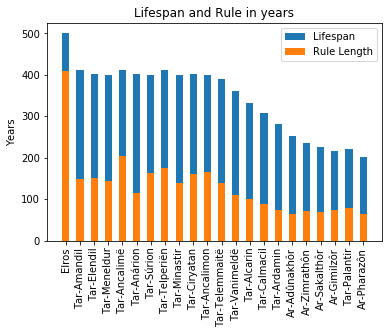

In [9]:
numenorian_kings_df = numenorian_kings_df.drop_duplicates('rule_length', keep = False)
numenorian_kings_df = numenorian_kings_df.dropna(subset=['rule_length'])

idx = numenorian_kings_df['name']
BAR_GRAPH_WIDTH = .5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(idx, numenorian_kings_df['lifespan'], BAR_GRAPH_WIDTH)
p2 = plt.bar(idx, numenorian_kings_df['rule_length'], BAR_GRAPH_WIDTH)

plt.ylabel('Years')
plt.title('Lifespan and Rule in years')
plt.xticks(idx, idx, rotation=90)
plt.legend((p1[0], p2[0]), ('Lifespan', 'Rule Length'))

plt.show()

I merged the rule length and lifespans of the Númenorian kings in a single bar graph and ordered them by the time they started ruling. We can see that starting from the rule of Tar-Telemmaitë, the lifespans of the Númenorian kings started decreasing.

A few events have happened during this time, relating to "the shadow" passing over Númenor:
1. Starting from **Tar-Vanimeldë**, all kings ruled until their death (or at least very close to this), which was a sudden change. Historically, the rulers abdicated their throne towards the end of their life.
1. Heralcumo (is husband of Tar-Vanimeldë, and the usurper we had previously removed) refused to let his son, the rightful heir, rule. Heralcumo was not of the Royal bloodline, and was therefore not in line of succession for the throne. This was a watershed moment that corruption had started manifesting in the Númenorians

The Kings also changed their name prefixes from `Tar` to `Ar` starting from **Ar-Adûnakhô**. This was a sign of rebellion against the Valar because `Tar` was of the language of the west (the Elves), while `Ar` was of the language of the east (men). This is an oversimplification as Tolkien goes deep into it, but for the uninitiated, this was a very blasphemous act.

## The Kings of Gondor and Arnor

The Kings of Gondor and Arnor are direct descenants of Elendil the Tall (you see him in the movies!). Elendil was one of **The Faithful**, a line that directly descends from one of sisters of **Tar-Meneldur**

Gondor was jointly ruled by Anarion and Isildur, while Arnor was ruled by Elendil. After Elendil and Anarion's death at the *Battle of the Last Alliance*, Isildur went North to rule Arnor, while leaving Gondor to his nephew, Meneldil.

In [10]:
gondorian_kings_df = kings_table[kings_table['titles']=='King of Gondor']
gondorian_kings_df

,name,other_names,titles,birth_age,birth_year,death_age,death_year,rule_age,rule_year,rule_length,lifespan
6,Meneldil,NaN,King of Gondor,S.A.,3318.0,T.A.,158.0,T.A.,2,156.0,281.0
8,Cemendur_(King_of_Gondor),NaN,King of Gondor,S.A.,3399.0,T.A.,238.0,T.A.,158,80.0,280.0
11,Eärendil_(King_of_Gondor),NaN,King of Gondor,T.A.,48.0,T.A.,324.0,T.A.,238,11.0,276.0
14,Anardil_(King_of_Gondor),NaN,King of Gondor,T.A.,136.0,T.A.,411.0,T.A.,324,15.0,275.0
16,Ostoher,NaN,King of Gondor,T.A.,222.0,T.A.,492.0,T.A.,411,24.0,270.0
19,Rómendacil_I,Tarostar,King of Gondor,T.A.,310.0,T.A.,541.0,T.A.,492,23.0,231.0
22,Turambar_(King_of_Gondor),NaN,King of Gondor,T.A.,397.0,T.A.,667.0,T.A.,541,61.0,270.0
25,Atanatar_I,NaN,King of Gondor,T.A.,480.0,T.A.,748.0,T.A.,667,81.0,268.0
28,Siriondil_(King_of_Gondor),NaN,King of Gondor,T.A.,570.0,T.A.,830.0,T.A.,748,29.0,260.0
31,Tarannon,Falastur,King of Gondor,T.A.,654.0,T.A.,913.0,T.A.,830,31.0,259.0


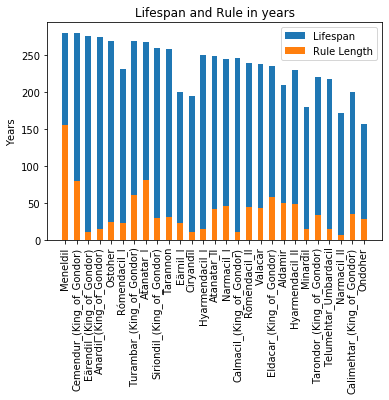

In [11]:
idx = gondorian_kings_df['name']
BAR_GRAPH_WIDTH = .5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(idx, gondorian_kings_df['lifespan'], BAR_GRAPH_WIDTH)
p2 = plt.bar(idx, gondorian_kings_df['rule_length'], BAR_GRAPH_WIDTH)

plt.ylabel('Years')
plt.title('Lifespan and Rule in years')
plt.xticks(idx, idx, rotation=90)
plt.legend((p1[0], p2[0]), ('Lifespan', 'Rule Length'))

plt.show()

It looks like even after the Akallabêth, those of royal Númenorian descent in Gondor still showed a decreasing trend in their lifespans. Gondor, however, has always been at war with their Eastern and Southern neighbors. Therefore, many kings have died in battle rather than by old age.





### Arnorian Kings (Work in Progress)

In [12]:
arnorian_kings_df = kings_table[
    (kings_table['titles']=='King of Arnor')
    | (kings_table['titles']=='King of Arthedain')
    | (kings_table['titles']=='Chieftain of the Dúnedain')]
